In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
example = """\
-----------
| | |o|*|o|
--o--------
| | | * | |
---------o-
|o|*|o| | |
-----------
| * | |*| |
-----------
| |o| | |o|
-----------
"""

In [3]:
print(example)

-----------
| | |o|*|o|
--o--------
| | | * | |
---------o-
|o|*|o| | |
-----------
| * | |*| |
-----------
| |o| | |o|
-----------



In [4]:
lines = example.splitlines()
lines

['-----------',
 '| | |o|*|o|',
 '--o--------',
 '| | | * | |',
 '---------o-',
 '|o|*|o| | |',
 '-----------',
 '| * | |*| |',
 '-----------',
 '| |o| | |o|',
 '-----------']

In [5]:
from enum import Enum

class Marker:
    class Color(Enum):
        WHITE = 0
        BLACK = 1
    
    def __init__(self, color, row, col):
        self.color = color
        self.row = row
        self.col = col

In [6]:
marker = Marker(Marker.Color.WHITE, 0, 1)
print(f'{marker.color}, ({marker.row}, {marker.col})')

Color.WHITE, (0, 1)


In [7]:
class Problem:
    @classmethod
    def read_str(cls, contents):
        lines = contents.splitlines()
        row_size = len(lines) // 2
        col_size = len(lines[0]) // 2
        markers = []
        for r_idx, line in enumerate(lines[1:-1]):  # 最初と最後の行は冗長なので無視
            for c_idx, char in enumerate(line[1:-1]): # 最初と最後の列は冗長なので無視
                row = r_idx / 2
                col = c_idx / 2
                if char == 'o':
                    marker = Marker(Marker.Color.WHITE, row, col)
                    markers.append(marker)
                elif char == '*':
                    marker = Marker(Marker.Color.BLACK, row, col)
                    markers.append(marker)
        return cls(row_size, col_size, markers)
    
    @classmethod
    def read_file(cls, filepath):
        with open(filepath) as f:
            contents = f.read()
        return cls.read_str(contents)    
    
    def __init__(self, row_size, col_size, markers):
        self.row_size = row_size
        self.col_size = col_size
        self.markers = markers

In [8]:
problem = Problem.read_str(example)

In [9]:
print(problem.row_size)
print(problem.col_size)
for marker in problem.markers:
    print(f'{marker.color}, ({marker.row}, {marker.col})')

5
5
Color.WHITE, (0.0, 2.0)
Color.BLACK, (0.0, 3.0)
Color.WHITE, (0.0, 4.0)
Color.WHITE, (0.5, 0.5)
Color.BLACK, (1.0, 2.5)
Color.WHITE, (1.5, 4.0)
Color.WHITE, (2.0, 0.0)
Color.BLACK, (2.0, 1.0)
Color.WHITE, (2.0, 2.0)
Color.BLACK, (3.0, 0.5)
Color.BLACK, (3.0, 3.0)
Color.WHITE, (4.0, 1.0)
Color.WHITE, (4.0, 4.0)


In [10]:
from pathlib import Path

In [11]:
example_dir = Path('example_problems')
problem = Problem.read_file(example_dir/'example.txt')

In [12]:
print(problem.row_size)
print(problem.col_size)
for i, marker in enumerate(problem.markers):
    print(f'[{i:2}] {marker.color}, ({marker.row}, {marker.col})')

5
5
[ 0] Color.WHITE, (0.0, 2.0)
[ 1] Color.BLACK, (0.0, 3.0)
[ 2] Color.WHITE, (0.0, 4.0)
[ 3] Color.WHITE, (0.5, 0.5)
[ 4] Color.BLACK, (1.0, 2.5)
[ 5] Color.WHITE, (1.5, 4.0)
[ 6] Color.WHITE, (2.0, 0.0)
[ 7] Color.BLACK, (2.0, 1.0)
[ 8] Color.WHITE, (2.0, 2.0)
[ 9] Color.BLACK, (3.0, 0.5)
[10] Color.BLACK, (3.0, 3.0)
[11] Color.WHITE, (4.0, 1.0)
[12] Color.WHITE, (4.0, 4.0)


In [13]:
day_problem = Problem.read_file(example_dir/'day.txt')
print(day_problem.row_size)
print(day_problem.col_size)
for i, marker in enumerate(day_problem.markers):
    print(f'[{i}] {marker.color}, ({marker.row}, {marker.col})')

5
4
[0] Color.WHITE, (1.0, 1.5)
[1] Color.BLACK, (2.0, 1.5)
[2] Color.WHITE, (3.0, 1.5)


In [14]:
oni_problem = Problem.read_file(example_dir/'oni.txt')
print(oni_problem.row_size)
print(oni_problem.col_size)
for i, marker in enumerate(oni_problem.markers):
    print(f'[{i:2}] {marker.color}, ({marker.row}, {marker.col})')

9
9
[ 0] Color.WHITE, (0.0, 0.5)
[ 1] Color.WHITE, (0.0, 4.0)
[ 2] Color.WHITE, (0.0, 8.0)
[ 3] Color.BLACK, (1.0, 1.5)
[ 4] Color.BLACK, (1.0, 4.0)
[ 5] Color.WHITE, (1.0, 7.0)
[ 6] Color.BLACK, (1.5, 5.0)
[ 7] Color.WHITE, (2.0, 2.0)
[ 8] Color.WHITE, (2.0, 4.0)
[ 9] Color.WHITE, (2.5, 7.0)
[10] Color.BLACK, (3.0, 3.0)
[11] Color.WHITE, (4.0, 0.0)
[12] Color.WHITE, (4.0, 2.0)
[13] Color.WHITE, (4.0, 4.0)
[14] Color.BLACK, (4.0, 5.0)
[15] Color.WHITE, (4.0, 7.0)
[16] Color.BLACK, (5.0, 1.5)
[17] Color.BLACK, (5.0, 6.0)
[18] Color.WHITE, (5.5, 5.0)
[19] Color.WHITE, (6.0, 1.0)
[20] Color.WHITE, (6.0, 3.0)
[21] Color.BLACK, (6.0, 6.5)
[22] Color.WHITE, (6.0, 8.0)
[23] Color.BLACK, (6.5, 4.0)
[24] Color.BLACK, (7.0, 1.0)
[25] Color.WHITE, (7.0, 6.0)
[26] Color.WHITE, (7.5, 2.0)
[27] Color.BLACK, (7.5, 8.0)
[28] Color.BLACK, (8.0, 0.0)
[29] Color.WHITE, (8.0, 3.0)
[30] Color.BLACK, (8.0, 6.0)


In [15]:
def draw_problem(problem):
    fig, ax = plt.subplots(figsize=(problem.col_size, problem.row_size))
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_aspect('equal')
    
    # 座標を(x, y) = (col, -row)とし、
    # 左上が(-0.5, 0.5)、右下が(problem.col_size - 0.5, -problem.row_size + 0.5)の矩形内に描画する
    top = 0.5
    bottom = -problem.row_size + 0.5
    left = -0.5
    right = problem.col_size - 0.5
    
    # 外枠
    ax.plot([left, right, right, left, left], [top, top, bottom, bottom, top], lw=2, color='black')
    
    # 縦線
    for col in range(problem.col_size - 1):
        cell_right = col + 0.5
        ax.plot([cell_right, cell_right], [top, bottom], lw=1, color='black', linestyle='dashed')

    # 横線
    for row in range(problem.row_size - 1):
        cell_bottom = - row - 0.5
        ax.plot([left, right], [cell_bottom, cell_bottom], lw=1, color='black', linestyle='dashed')

    # マーカー
    for marker in problem.markers:
        color = 'white' if marker.color == Marker.Color.WHITE else 'black'
        ax.scatter(marker.col, -marker.row, s=250, c=color, edgecolors='black', linewidths=2)

    return fig

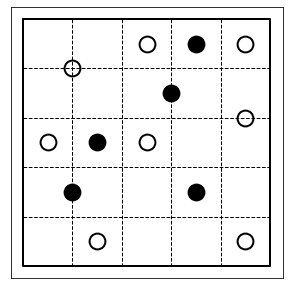

In [16]:
example_fig = draw_problem(problem)
example_fig;

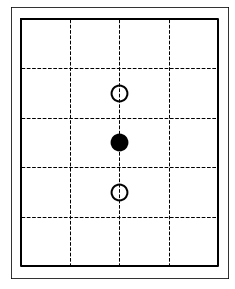

In [17]:
day_fig = draw_problem(day_problem)
day_fig;

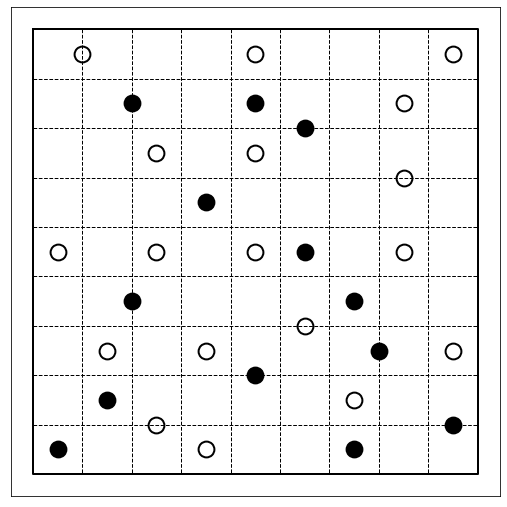

In [18]:
oni_fig = draw_problem(oni_problem)
oni_fig;